Artificial Neural Networks <br>
Nikos Periklis Chourdas - tp4774 <br>
nikos.hourdas@gmail.com 

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk 
import neurolab as neuro



# Step 1 

dataset import and visualization 

In [2]:
# importing the dataset and creating headers for each nescessary collumn

dataset_names = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']

datasetOG = pd.read_csv("haberman.data",header= None , names = dataset_names) 

In [3]:
# Debugging
# check to make sure data is loaded correctly
# print(dataset)

exploring the Dataset 

In [4]:
datasetOG.head(5)

,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


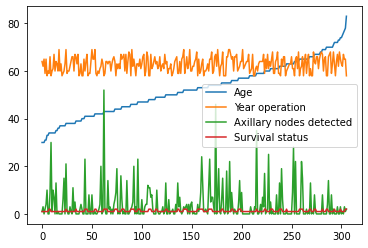

In [5]:
datasetOG.plot()
plt.show()

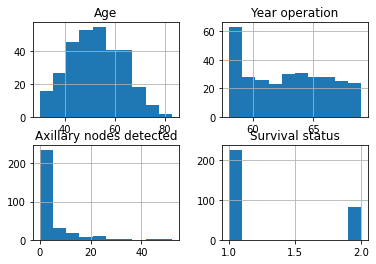

In [6]:
datasetOG.hist()
plt.show()

visualization using scatter plot 

In [7]:
datasetOG.shape

(306, 4)

In [8]:
# Debugging 

# np.shape(dataset)
# print(dataset.columns)

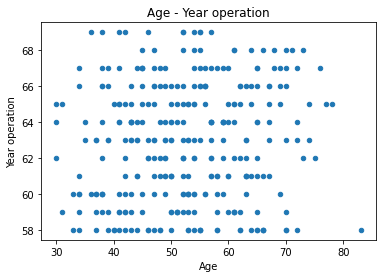

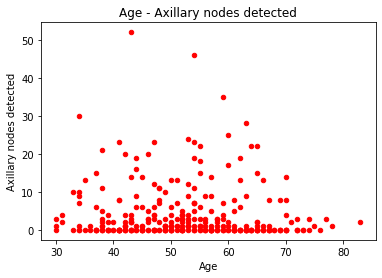

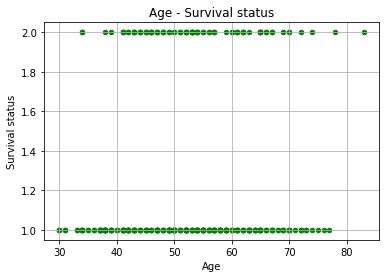

In [9]:


datasetOG.plot(kind = "scatter" , x = "Age" , y = "Year operation", title = "Age - Year operation")

datasetOG.plot(kind = "scatter" , x = "Age" , y = "Axillary nodes detected",color = "red",title = "Age - Axillary nodes detected")

datasetOG.plot(kind = "scatter" , x = "Age" , y = "Survival status",color="green", title = "Age - Survival status")

plt.grid()
plt.show()


Target Transform

In [10]:
temp_Array = datasetOG.values
X= np.array(datasetOG)
T = temp_Array[:,3]

In [11]:
target = np.empty([306,3])

for i in range(len(T)):
    if T[i]==1:
        target[i][0] = 0 
        target[i][1] = 0 
        target[i][2] = 1
    elif T[i]==2:
        target[i][0] = 0
        target[i][1] = 1 
        target[i][2] = 0

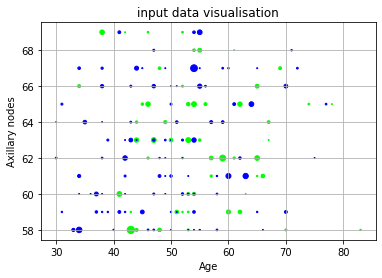

In [12]:



plt.scatter(datasetOG['Age'],datasetOG['Year operation'],datasetOG['Axillary nodes detected'],c=target);
plt.title('input data visualisation')
plt.xlabel('Age')
plt.ylabel('Axillary nodes')
plt.grid(True)
plt.show();

In [13]:
# Debugging 

# print(target)

# Step 2 <br>
Check for outliers and remove outliers <br>
Check from Null values and replace 

In [14]:
datasetOG.isnull()

,Age,Year operation,Axillary nodes detected,Survival status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False
304,False,False,False,False


# Step 3 <br>
pre-processing the data <br>
creating a training and test set 

import libraries for data split 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [79]:


# starting split rate 80% training data - 20% test set 

Dataset_Train, Dataset_Test , Target_Train , Target_Test = train_test_split(datasetOG,target,test_size = 0.3 , random_state = 43)

Dataset_Train = MinMaxScaler().fit_transform(Dataset_Train)

Dataset_Test = MinMaxScaler().fit_transform(Dataset_Test)

In [17]:
# debug 
# print(Dataset_Train)
# print(Dataset_Test)

network Training 

 feed-forward backpropagation network - newff 
 

In [87]:


# np.random.seed(42)

# 4 input neurons - 3 output neurons 
net = neuro.net.newff(neuro.tool.minmax(X),[4,3])

# # print(len(net.layers))

net.layers[-1].transf = neuro.trans.LogSig()  #output layer 
net.layers[0].transf = neuro.trans.LogSig() #hidden layer 
net.layers[1].transf = neuro.trans.LogSig() #hidden layer 
# # max number of layers allowed to use 

# train neuron
error = net.trainf = neuro.train.train_rprop(net,Dataset_Train,Target_Train , epochs=1000 , show = 1
                                             , lr = 0.3 , goal = 0.00005 )


Epoch: 1; Error: 197.56780153132485;
Epoch: 2; Error: 172.4783658308063;
Epoch: 3; Error: 117.21828198353182;
Epoch: 4; Error: 48.35557103590547;
Epoch: 5; Error: 19.32565459106957;
Epoch: 6; Error: 9.454048675468911;
Epoch: 7; Error: 3.7115356510323063;
Epoch: 8; Error: 1.3432123883483469;
Epoch: 9; Error: 0.3912922465581955;
Epoch: 10; Error: 0.09763118756962419;
Epoch: 11; Error: 0.01962787380344066;
Epoch: 12; Error: 0.003217734698392054;
Epoch: 13; Error: 0.00043859407627132167;
Epoch: 14; Error: 6.205621000792781e-05;
Epoch: 15; Error: 1.1309042186301525e-05;
The goal of learning is reached


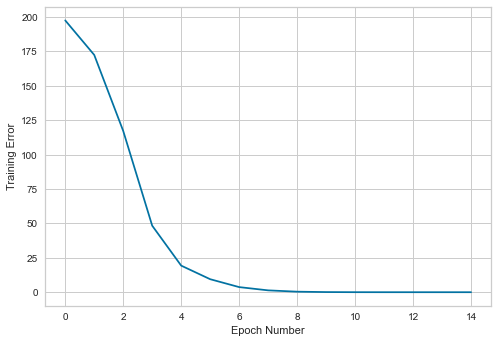

In [88]:
# display graph of training error 
plt.plot(error)
plt.xlabel("Epoch Number")
plt.ylabel("Training Error")
plt.grid(True)
plt.show()


In [89]:
# Simulate the neural network 

out = net.sim(Dataset_Test)
out = np.around(out)

In [90]:
# calculate accuracy 

correct = (out == Target_Test).all(axis = 1)
acc=(np.sum(correct)/len(out))*100

print("accuracy: ");print(acc)

accuracy: 
100.0


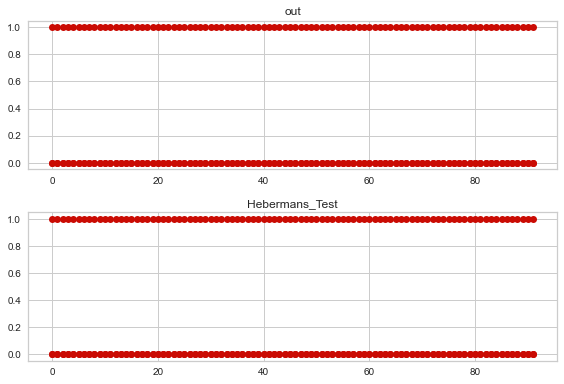

In [91]:
np.array_equal(out, Target_Test)
False
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out,'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(Target_Test,'ro')
plt.title('Hebermans_Test')
plt.grid(True)
plt.tight_layout()
plt.show()

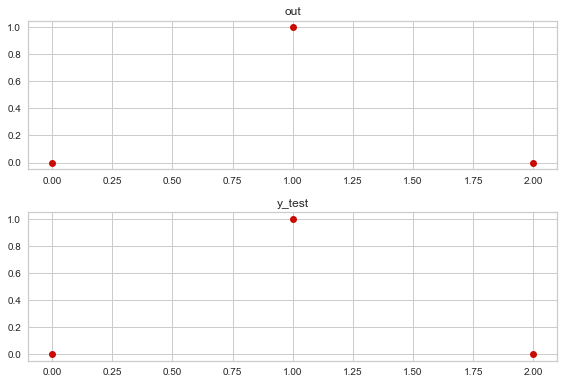

In [92]:
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(out[34],'ro')
plt.title('out')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(Target_Test[34],'ro')
plt.title('y_test')
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
# reset the dataset for good measure 

X = np.array(datasetOG)

In [94]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

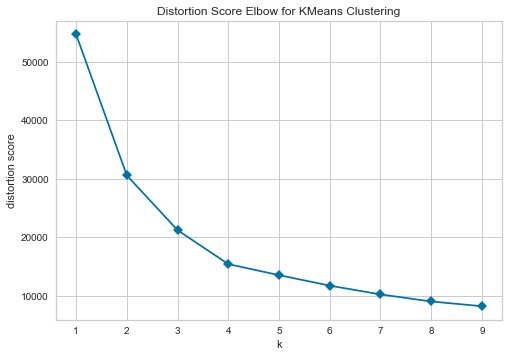

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [95]:
# Elbow Method 

model = KMeans()


visualizer = KElbowVisualizer(model, k=(1,10), timings=False ,locate_elbow=False)

visualizer.fit(X)

visualizer.show() 

SiLhouette method 

In [96]:
from sklearn.metrics import silhouette_score

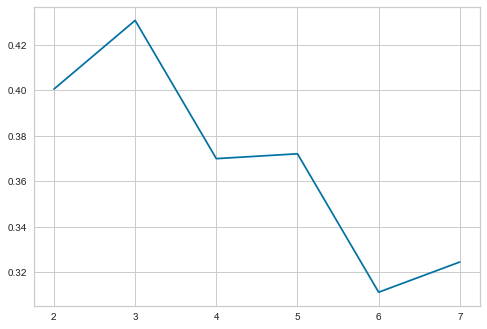

In [97]:
# Sillhouette method


sse = []

for k in range(2, 8):
 kmeans = KMeans(n_clusters=k).fit(X)
 sse.append([k, silhouette_score(X, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1]);
plt.show()

Scale Data in preperation for kohonen network

In [98]:
from sklearn import preprocessing

X = preprocessing.MinMaxScaler().fit_transform(X)

training the networks with winnder take all algorithm

In [99]:
net = neuro.net.newc(neuro.tool.minmax(X),10)

error = net.trainf = neuro.train.train_cwta(net,X,epochs = 1000 , show = 100)

Epoch: 100; Error: 97.5514122405556;
Epoch: 200; Error: 97.91274376702171;
Epoch: 300; Error: 98.00612732019212;
Epoch: 400; Error: 97.91673793150383;
Epoch: 500; Error: 97.9027524403487;
Epoch: 600; Error: 98.03214621797342;
Epoch: 700; Error: 98.0114475085795;
Epoch: 800; Error: 97.97847639523563;
Epoch: 900; Error: 97.90202337788408;
Epoch: 1000; Error: 98.03028279470018;
The maximum number of train epochs is reached


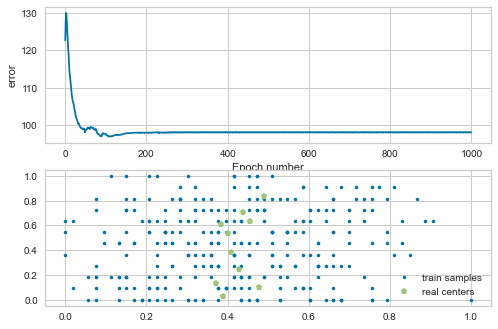

In [100]:
plt.title('Classification Problem')
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('error')

w = net.layers[0].np['w']
plt.subplot(2,1,2)
plt.plot(X[:,0], X[:,1], '.', \
        w[:,0], w[:,1], 'p')
plt.legend(['train samples', 'real centers'])
plt.show();

ining the network with Consience Winner Take All algorithm 

In [101]:
error = net.trainf = neuro.train.train_wta(net, X , epochs = 1000 , show = 100)

Epoch: 100; Error: 85.89880790990279;
Epoch: 200; Error: 85.95079315213692;
Epoch: 300; Error: 85.95432861856249;
Epoch: 400; Error: 85.9545532682018;
Epoch: 500; Error: 85.9545615717896;
Epoch: 600; Error: 85.95456062908049;
Epoch: 700; Error: 85.9545602955767;
Epoch: 800; Error: 85.95456022870981;
Epoch: 900; Error: 85.95456021724688;
Epoch: 1000; Error: 85.95456021541472;
The maximum number of train epochs is reached


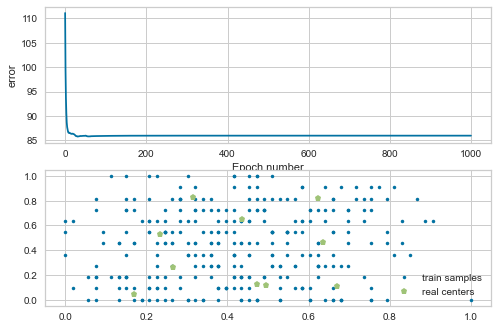

In [102]:
plt.figure(2)
plt.subplot(2,1,1)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('error')


w = net.layers[0].np['w']
plt.subplot(2,1,2)
plt.plot(X[:,0], X[:,1], '.', \
        w[:,0], w[:,1], 'p')
plt.legend(['train samples', 'real centers'])
plt.show();